# Reproducing DeepDTA

Reference - https://academic.oup.com/bioinformatics/article/34/17/i821/5093245
Data source - https://www.nature.com/articles/nbt.1990

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import packages
import tensorflow as tf
import numpy as np
import csv
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [ ]:
# Load data
data = [] # list of lists of the form [smiles, sequence, pKd]

with open('drive/MyDrive/nlp (1)/dta_df.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader) # skip header
  for row in reader:
      triplet = []
      triplet.append(row[0])
      triplet.append(row[1])
      triplet.append(float(row[2]))
      data.append(triplet)

len(data) # 23785

23785

In [ ]:
data[0]

['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSE

In [ ]:
smiles = []
proteins = []
labels = []
random.shuffle(data)

for triplet in range(len(data)):
  smiles.append(data[triplet][0])
  proteins.append(data[triplet][1])
  labels.append(data[triplet][2])

In [ ]:
print(smiles[0])
print(proteins[0])
print(labels[0])
# looks good!

CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=C5C=NNC5=CC=C4)N6CCOCC6
MSTFRQEDVEDHYEMGEELGSGQFAIVRKCRQKGTGKEYAAKFIKKRRLSSSRRGVSREEIEREVNILREIRHPNIITLHDIFENKTDVVLILELVSGGELFDFLAEKESLTEDEATQFLKQILDGVHYLHSKRIAHFDLKPENIMLLDKNVPNPRIKLIDFGIAHKIEAGNEFKNIFGTPEFVAPEIVNYEPLGLEADMWSIGVITYILLSGASPFLGETKQETLTNISAVNYDFDEEYFSNTSELAKDFIRRLLVKDPKRRMTIAQSLEHSWIKAIRRRNVRGEDSGRKPERRRLKTTRLKEYTIKSHSSLPPNNSYADFERFSKVLEEAAAAEEGLRELQRSRRLCHEDVEALAAIYEEKEAWYREESDSLGQDLRRLRQELLKTEALKRQAQEEAKGALLGTSGLKRRFSRLENRYEALAKQVASEMRFVQDLVRALEQEKLQGVECGLR
5.7447274948966935


In [ ]:
split = int(0.9 * len(smiles))
train_smiles = smiles[:split]
test_smiles = smiles[split:]
train_proteins = proteins[:split]
test_proteins = proteins[split:]
train_labels = labels[:split]
test_labels = labels[split:]

In [ ]:
# Tokenize smiles
# train
#declaring tokenizer
tokenizer_smiles = Tokenizer(char_level = True)
#fitting the tokenizer
tokenizer_smiles.fit_on_texts(train_smiles)

#assigning numerical index to unique tokens
word_index_smiles = tokenizer_smiles.word_index
vocab_size_smiles = len(word_index_smiles)

#converting from text to sequence
train_sequences_smiles = tokenizer_smiles.texts_to_sequences(train_smiles)
train_padded_smiles = pad_sequences(train_sequences_smiles, truncating = "post", padding = "post", maxlen = 85)

# test
test_sequences_smiles = tokenizer_smiles.texts_to_sequences(test_smiles)
test_padded_smiles = pad_sequences(test_sequences_smiles, truncating = "post", padding = "post", maxlen = 85)

In [ ]:
# Tokenize proteins
# train

tokenizer_proteins = Tokenizer(char_level = True)
tokenizer_proteins.fit_on_texts(train_proteins)

word_index_proteins = tokenizer_proteins.word_index
vocab_size_proteins = len(word_index_proteins)


train_sequences_proteins = tokenizer_proteins.texts_to_sequences(train_proteins)
train_padded_proteins = pad_sequences(train_sequences_proteins, truncating = "post", padding = "post", maxlen = 1200)

# test
test_sequences_proteins = tokenizer_proteins.texts_to_sequences(test_proteins)
test_padded_proteins = pad_sequences(test_sequences_proteins, truncating = "post", padding = "post", maxlen = 1200)

In [ ]:
#number of unique characters in smiles sequence
print(vocab_size_smiles)
#number of unique characters in protein sequence
print(vocab_size_proteins)

22
20


In [ ]:
# convert to numpy arrays and check dimensions

#converting to numpy array and checking the dimensions
train_smiles_array = np.array(train_padded_smiles)
test_smiles_array = np.array(test_padded_smiles)
train_proteins_array = np.array(train_padded_proteins)
test_proteins_array = np.array(test_padded_proteins)
train_labels_array = np.array(train_labels, dtype = "float32")
test_labels_array = np.array(test_labels, dtype = "float32")

print(f"Train smiles array shape: {train_smiles_array.shape}")
print(f"Test smiles array shape: {test_smiles_array.shape}")
print(f"Train proteins array shape: {train_proteins_array.shape}")
print(f"Test proteins array shape: {test_proteins_array.shape}")
print(f"Train labels array shape: {train_labels_array.shape}")
print(f"Test labels array shape: {test_labels_array.shape}")

Train smiles array shape: (21406, 85)
Test smiles array shape: (2379, 85)
Train proteins array shape: (21406, 1200)
Test proteins array shape: (2379, 1200)
Train labels array shape: (21406,)
Test labels array shape: (2379,)


# DeepDTA model

In [ ]:
from keras.layers import Input, Embedding, Concatenate, Conv1D, GlobalAveragePooling1D, Dense, Dropout, Bidirectional, LSTM, Flatten, GlobalMaxPooling1D
from keras.models import Model

# Define two input layers
smile_input = Input((85,))
protein_input = Input((1200,))

# smiles encoder
embed_smiles = Embedding(vocab_size_smiles+1, 128, input_length=85)(smile_input)
conv_smiles = Conv1D(32, 4, activation = "relu")(embed_smiles)
conv_smiles = Conv1D(64, 6, activation = "relu")(conv_smiles)
conv_smiles = Conv1D(96, 8, activation = "relu")(conv_smiles)
max_smiles = GlobalMaxPooling1D()(conv_smiles)

# proteins encoder
embed_protein = Embedding(vocab_size_proteins+1, 128, input_length=1200)(protein_input)
conv_protein = Conv1D(32, 4, activation = "relu")(embed_protein)
conv_protein = Conv1D(64, 8, activation = "relu")(conv_protein)
conv_protein = Conv1D(96, 12, activation = "relu")(conv_protein)
max_protein = GlobalMaxPooling1D()(conv_protein)

# concatenate the two encoder outputs
concat_layer = Concatenate()([max_smiles, max_protein])

# decoder
output = Dense(1024, activation = "relu")(concat_layer)
output = Dropout(0.1)(output)
output = Dense(1024, activation = "relu")(output)
output = Dropout(0.1)(output)
output = Dense(512, activation = "relu")(output)
output = Dense(1)(output)

# define a model with a list of two inputs
model= Model(inputs = [smile_input, protein_input], outputs = output)

In [ ]:
# define a model with a list of two inputs
model = Model(inputs = [smile_input, protein_input], outputs = output)

# compile model
optimizer = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='mse', optimizer = optimizer, metrics=['mse'])

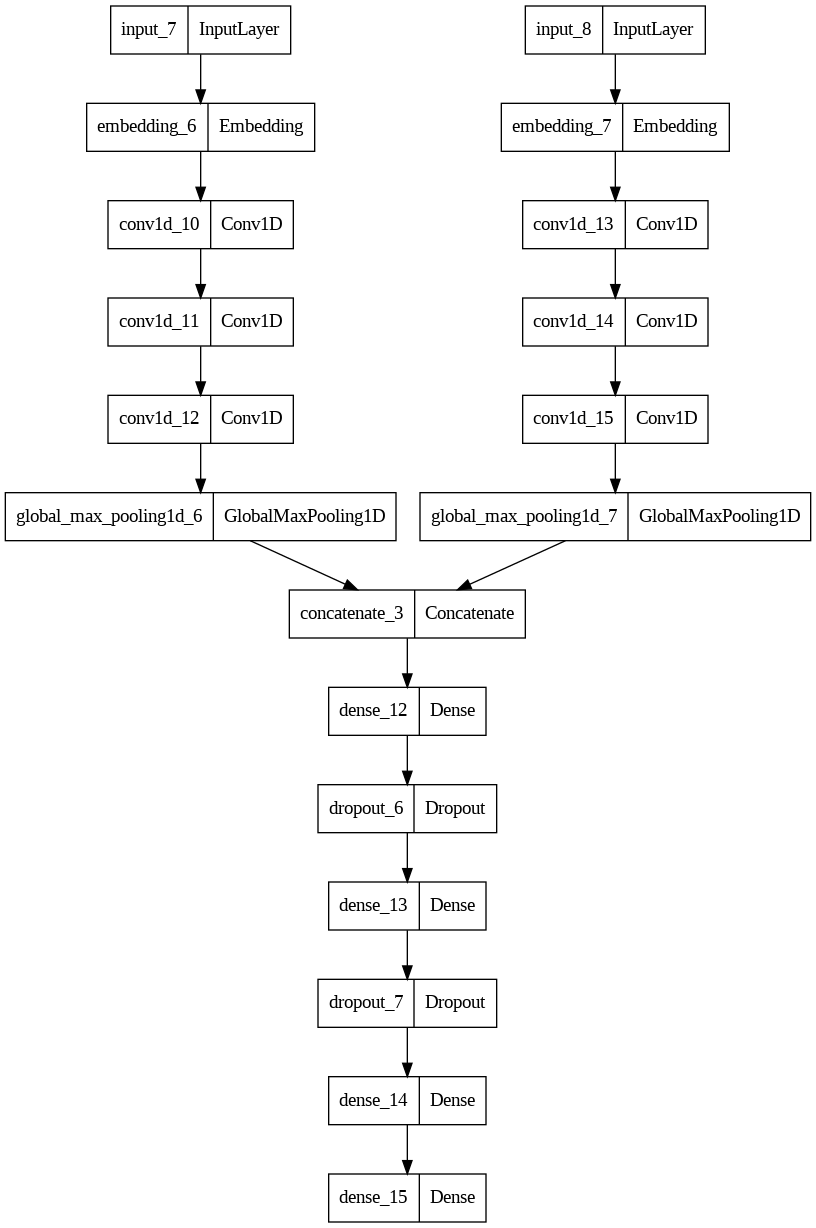

In [ ]:
# visualize model
tf.keras.utils.plot_model(model)
#model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit([train_smiles_array, train_proteins_array], train_labels_array,
                    epochs = 100, batch_size = 256, validation_data = ([test_smiles_array, test_proteins_array], test_labels_array), callbacks = [early_stopping])

Epoch 1/100
84/84 [==============================] - 12s 96ms/step - loss: 2.3246 - mse: 2.3246 - val_loss: 0.5262 - val_mse: 0.5262
Epoch 2/100
84/84 [==============================] - 8s 91ms/step - loss: 0.5028 - mse: 0.5028 - val_loss: 0.4806 - val_mse: 0.4806
Epoch 3/100
84/84 [==============================] - 8s 93ms/step - loss: 0.4732 - mse: 0.4732 - val_loss: 0.4794 - val_mse: 0.4794
Epoch 4/100
84/84 [==============================] - 8s 91ms/step - loss: 0.4621 - mse: 0.4621 - val_loss: 0.4571 - val_mse: 0.4571
Epoch 5/100
84/84 [==============================] - 8s 91ms/step - loss: 0.4566 - mse: 0.4566 - val_loss: 0.4544 - val_mse: 0.4544
Epoch 6/100
84/84 [==============================] - 8s 90ms/step - loss: 0.4573 - mse: 0.4573 - val_loss: 0.4571 - val_mse: 0.4571
Epoch 7/100
84/84 [==============================] - 7s 89ms/step - loss: 0.4500 - mse: 0.4500 - val_loss: 0.4491 - val_mse: 0.4491
Epoch 8/100
84/84 [==============================] - 7s 88ms/step - loss: 0

<Figure size 640x480 with 0 Axes>

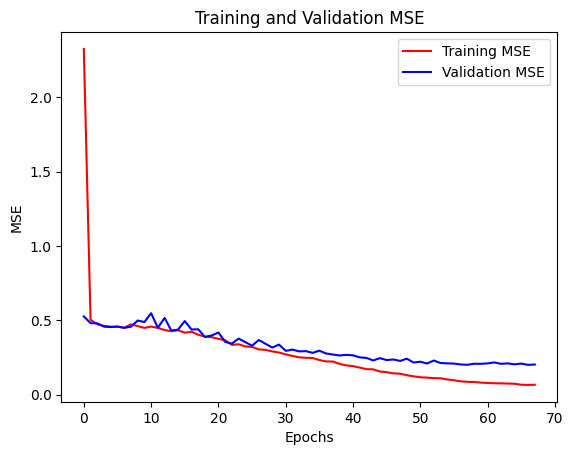

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mse=history.history['mse']
val_mse=history.history['val_mse']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(mse)) # Get number of epochs

#------------------------------------------------
# Plot training and validation mse per epoch
#------------------------------------------------
plt.plot(epochs, mse, 'r')
plt.plot(epochs, val_mse, 'b')
plt.title('Training and Validation MSE')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["Training MSE", "Validation MSE"])

plt.figure()

# Make predictions

In [ ]:
# Function to predict drug-protein pKd

def predict_pKd(drug, protein):
  drug_sequence = tokenizer_smiles.texts_to_sequences([drug])
  drug_padded = pad_sequences(drug_sequence, truncating = "post", padding = "post", maxlen = 85)
  protein_sequence = tokenizer_proteins.texts_to_sequences([protein])
  protein_padded = pad_sequences(protein_sequence, truncating = "post", padding = "post", maxlen = 1200)
  prediction = model.predict([tf.expand_dims(drug_padded, axis = -1), tf.expand_dims(protein_padded, axis = -1)])

  return(prediction.item())

In [ ]:
drug = test_smiles[1520]
protein = test_proteins[1520]
label = test_labels[1520]

print(label)
predict_pKd(drug = drug, protein = protein)

5.0
1/1 [==============================] - 0s 209ms/step


4.9992876052856445

In [ ]:
loss, mse = model.evaluate([test_smiles_array, test_proteins_array], test_labels_array)
print("Test Mean Squared Error:", mse)

75/75 [==============================] - 1s 8ms/step - loss: 0.2009 - mse: 0.2009
Test Mean Squared Error: 0.20088191330432892


In [ ]:
test_labels.index(max(test_labels))

1531

In [ ]:
from keras.layers import Input, Embedding, Concatenate, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns

# Define two input layers
smile_input = Input((85,))
protein_input = Input((1200,))

# Smiles encoder
embed_smiles = Embedding(vocab_size_smiles + 1, 64, input_length=85)(smile_input)
conv_smiles = Conv1D(32, 4, activation="relu")(embed_smiles)
conv_smiles = Conv1D(64, 6, activation="relu")(conv_smiles)
max_smiles = GlobalMaxPooling1D()(conv_smiles)

# Proteins encoder
embed_protein = Embedding(vocab_size_proteins + 1, 64, input_length=1200)(protein_input)
conv_protein = Conv1D(32, 4, activation="relu")(embed_protein)
conv_protein = Conv1D(64, 8, activation="relu")(conv_protein)
max_protein = GlobalMaxPooling1D()(conv_protein)

# Concatenate the two encoder outputs
concat_layer = Concatenate()([max_smiles, max_protein])

# Decoder
output = Dense(1024, activation="relu")(concat_layer)
output = Dropout(0.1)(output)
output = Dense(1024, activation="relu")(output)
output = Dropout(0.1)(output)
output = Dense(512, activation="relu")(output)
output = Dense(1)(output)

# Define the model with a list of two inputs
model = Model(inputs=[smile_input, protein_input], outputs=output)

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

The numbers on the x and y axis represent the indices or positions of the features (encoded smiles and encoded proteins) in the correlation matrix. Each number corresponds to a specific feature.

For example, if the number 0 is displayed on the x-axis, it represents the first feature in the correlation matrix, while the number 1 represents the second feature, and so on. Similarly, the numbers on the y-axis represent the features in the correlation matrix.

The correlation matrix provides a measure of the relationship or similarity between the features. The values in the matrix represent the correlation coefficients, which indicate the strength and direction of the correlation between pairs of features. The higher the absolute value of the correlation coefficient, the stronger the correlation between the features. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero indicate a weak or no correlation.

By examining the correlation matrix, you can gain insights into the relationships between different features and identify patterns or dependencies among them.

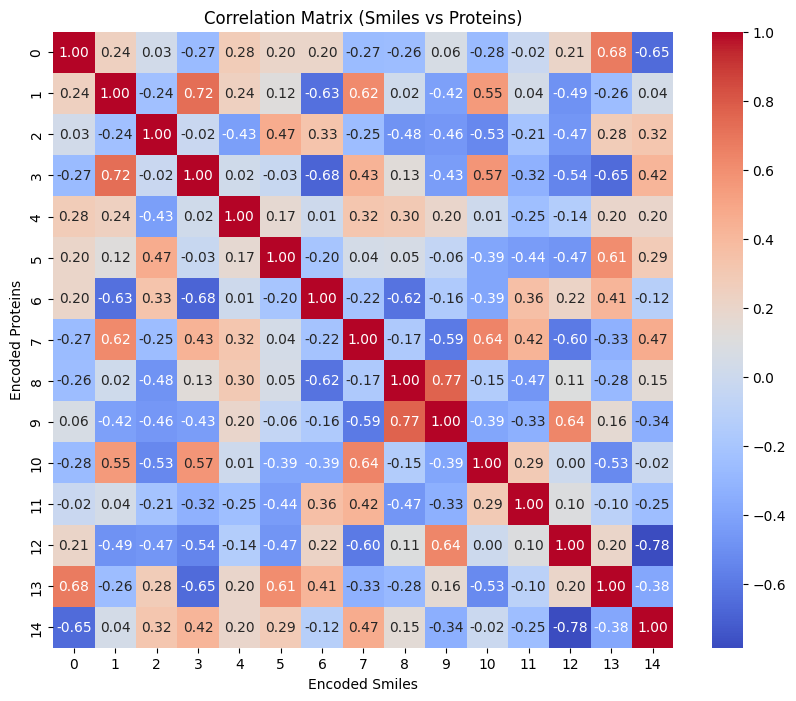

In [ ]:
# Get a smaller subset of training data to address resource exhaustion
subset_size = 10
train_smiles_subset = train_smiles_array[:subset_size]
train_proteins_subset = train_proteins_array[:subset_size]

# Get the encoded features from the trained model
encoded_smiles = Model(inputs=model.input, outputs=model.get_layer('global_max_pooling1d_2').output)([train_smiles_subset, train_proteins_subset])
encoded_proteins = Model(inputs=model.input, outputs=model.get_layer('global_max_pooling1d_3').output)([train_smiles_subset, train_proteins_subset])

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(encoded_smiles, encoded_proteins, rowvar=False)

# Reduce the number of features for visualization
max_features = 15
reduced_matrix = correlation_matrix[:max_features, :max_features]

# Plot the reduced correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(reduced_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Smiles vs Proteins)")
plt.xlabel("Encoded Smiles")
plt.ylabel("Encoded Proteins")
plt.show()


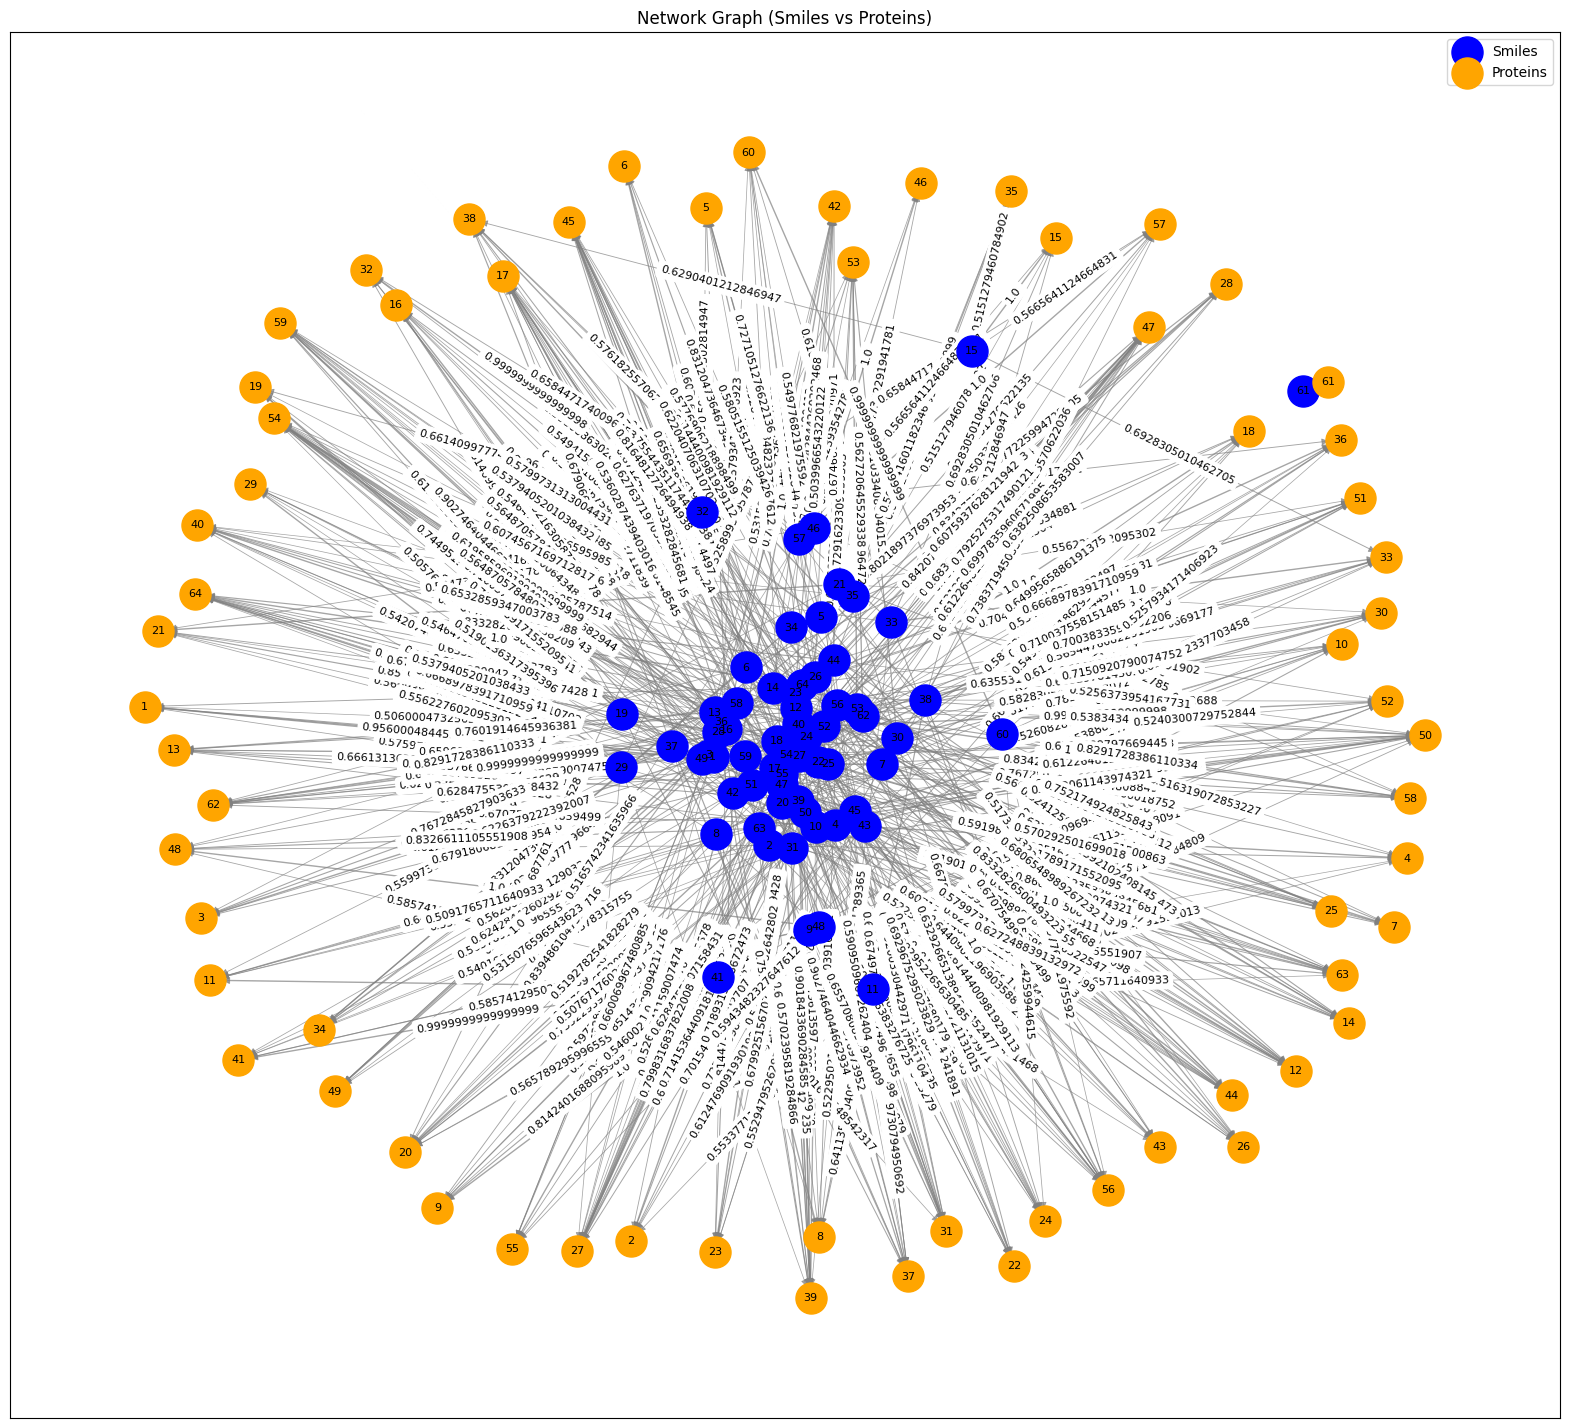

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph object
graph = nx.DiGraph()

# Add nodes for encoded smiles
for i in range(encoded_smiles.shape[1]):
    graph.add_node(f"Smiles {i+1}", feature="Smiles")

# Add nodes for encoded proteins
for i in range(encoded_proteins.shape[1]):
    graph.add_node(f"Proteins {i+1}", feature="Proteins")

# Add edges between smiles and proteins
for i in range(encoded_smiles.shape[1]):
    for j in range(encoded_proteins.shape[1]):
        weight = correlation_matrix[i, j]
        if weight > 0.5:  # Add only edges with correlation above a threshold for better clarity
            graph.add_edge(f"Smiles {i+1}", f"Proteins {j+1}", weight=weight)

# Set node positions for better layout
pos = nx.spring_layout(graph)

# Increase the figure size
plt.figure(figsize=(20, 18))

# Draw nodes
smiles_nodes = [node for node, attr in graph.nodes(data=True) if attr["feature"] == "Smiles"]
proteins_nodes = [node for node, attr in graph.nodes(data=True) if attr["feature"] == "Proteins"]
nx.draw_networkx_nodes(graph, pos, nodelist=smiles_nodes, node_color="blue", node_size=500, label="Smiles")
nx.draw_networkx_nodes(graph, pos, nodelist=proteins_nodes, node_color="orange", node_size=500, label="Proteins")

# Draw edges
edges = graph.edges()
weights = [graph[u][v]["weight"] for u, v in edges]
nx.draw_networkx_edges(graph, pos, edgelist=edges, width=weights, edge_color="gray", alpha=0.7, arrows=True)

# Add edge labels
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

# Add labels
labels = {node: node.split()[1] for node in graph.nodes()}
nx.draw_networkx_labels(graph, pos, labels=labels, font_size=8)

# Set plot title and legend
plt.title("Network Graph (Smiles vs Proteins)")
plt.legend()

# Display the plot
plt.show()


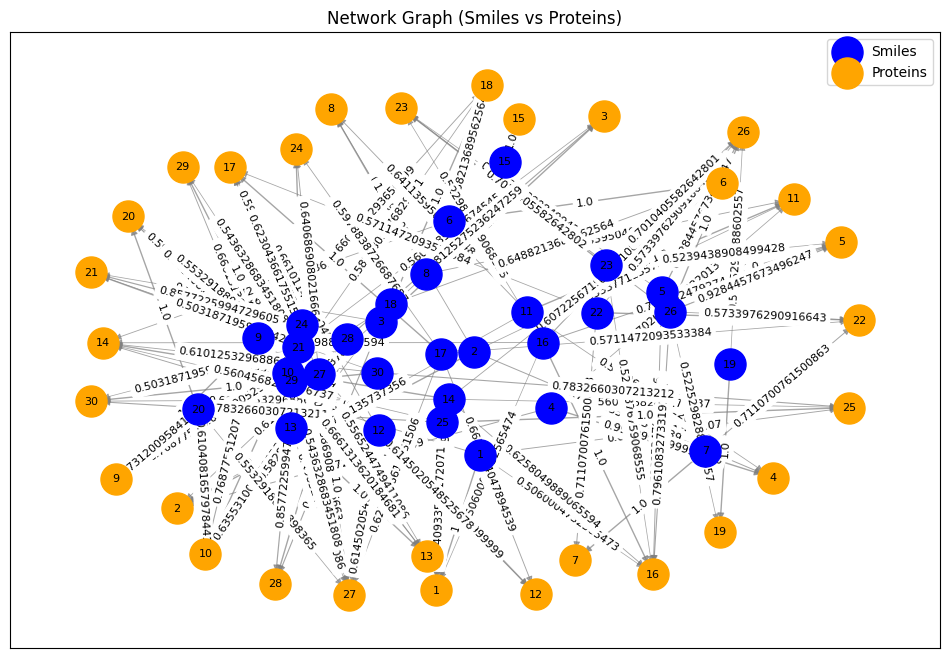

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Maximum number of features to include
max_features = 30

# Create a directed graph object
graph = nx.DiGraph()

# Add nodes for encoded smiles (up to max_features)
for i in range(min(max_features, encoded_smiles.shape[1])):
    graph.add_node(f"Smiles {i+1}", feature="Smiles")

# Add nodes for encoded proteins (up to max_features)
for i in range(min(max_features, encoded_proteins.shape[1])):
    graph.add_node(f"Proteins {i+1}", feature="Proteins")

# Add edges between smiles and proteins
for i in range(min(max_features, encoded_smiles.shape[1])):
    for j in range(min(max_features, encoded_proteins.shape[1])):
        weight = correlation_matrix[i, j]
        if weight > 0.5:  # Add only edges with correlation above a threshold for better clarity
            graph.add_edge(f"Smiles {i+1}", f"Proteins {j+1}", weight=weight)

# Set node positions for better layout
pos = nx.spring_layout(graph)

# Increase the figure size
plt.figure(figsize=(12, 8))

# Draw nodes
smiles_nodes = [node for node, attr in graph.nodes(data=True) if attr["feature"] == "Smiles"]
proteins_nodes = [node for node, attr in graph.nodes(data=True) if attr["feature"] == "Proteins"]
nx.draw_networkx_nodes(graph, pos, nodelist=smiles_nodes, node_color="blue", node_size=500, label="Smiles")
nx.draw_networkx_nodes(graph, pos, nodelist=proteins_nodes, node_color="orange", node_size=500, label="Proteins")

# Draw edges
edges = graph.edges()
weights = [graph[u][v]["weight"] for u, v in edges]
nx.draw_networkx_edges(graph, pos, edgelist=edges, width=weights, edge_color="gray", alpha=0.7, arrows=True)

# Add edge labels
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

# Add labels
labels = {node: node.split()[1] for node in graph.nodes()}
nx.draw_networkx_labels(graph, pos, labels=labels, font_size=8)

# Set plot title and legend
plt.title("Network Graph (Smiles vs Proteins)")
plt.legend()

# Display the plot
plt.show()


In [ ]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.3 MB/s eta 0:00:00


# Next steps -
- https://www.sciencedirect.com/science/article/pii/S1046202319302762 (wonderful review)

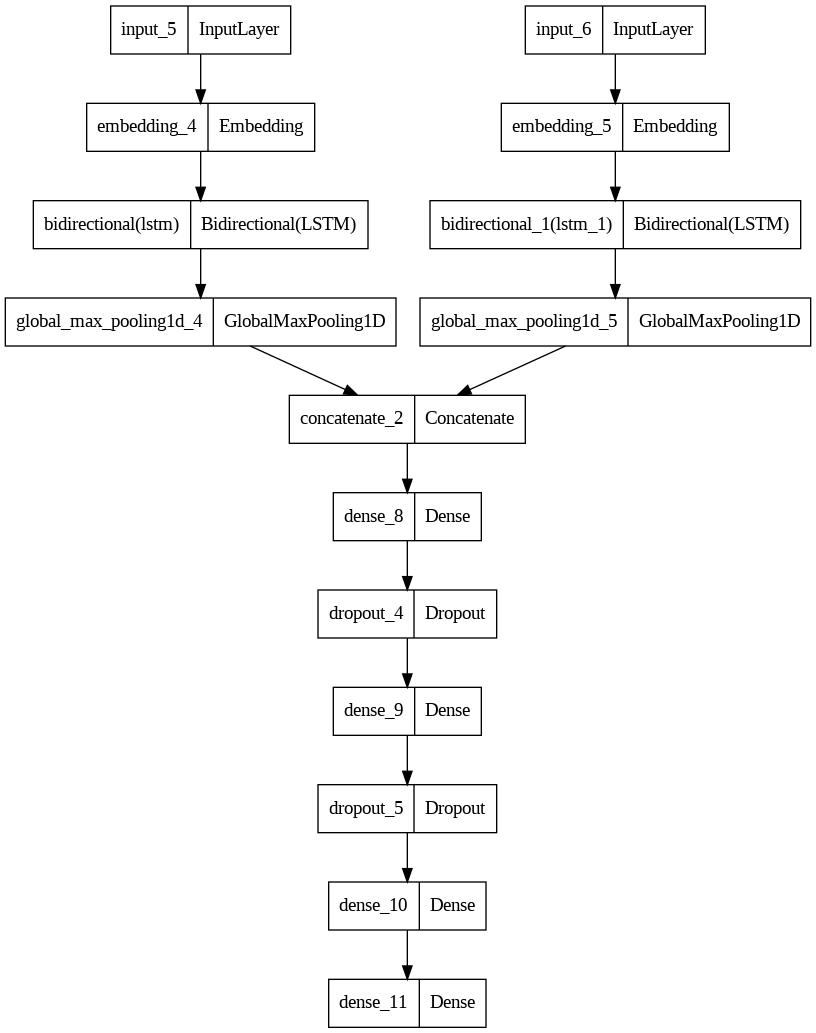

In [ ]:
from keras.layers import Input, Embedding, Concatenate, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Bidirectional, LSTM
from keras.models import Model

# Define two input layers
smile_input = Input((85,))
protein_input = Input((1200,))

# smiles encoder
embed_smiles = Embedding(vocab_size_smiles+1, 128, input_length=85)(smile_input)
lstm_smiles = Bidirectional(LSTM(128, return_sequences=True))(embed_smiles)
max_smiles = GlobalMaxPooling1D()(lstm_smiles)

# proteins encoder
embed_protein = Embedding(vocab_size_proteins+1, 128, input_length=1200)(protein_input)
lstm_protein = Bidirectional(LSTM(128, return_sequences=True))(embed_protein)
max_protein = GlobalMaxPooling1D()(lstm_protein)

# concatenate the two encoder outputs
concat_layer = Concatenate()([max_smiles, max_protein])

# decoder
output = Dense(1024, activation="relu")(concat_layer)
output = Dropout(0.1)(output)
output = Dense(1024, activation="relu")(output)
output = Dropout(0.1)(output)
output = Dense(512, activation="relu")(output)
output = Dense(1)(output)

# define a model with a list of two inputs
model = Model(inputs=[smile_input, protein_input], outputs=output)

# compile model
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

# visualize model
tf.keras.utils.plot_model(model)
#model.summary()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001,  # minimum amount of change to count as an improvement
    patience=10,  # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    [train_smiles_array, train_proteins_array],
    train_labels_array,
    epochs=100,
    batch_size=256,
    validation_data=([test_smiles_array, test_proteins_array], test_labels_array),
    callbacks=[early_stopping]
)


Epoch 1/100
84/84 [==============================] - 37s 324ms/step - loss: 2.6403 - mse: 2.6403 - val_loss: 0.6114 - val_mse: 0.6114
Epoch 2/100
84/84 [==============================] - 26s 308ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.5533 - val_mse: 0.5533
Epoch 3/100
84/84 [==============================] - 25s 302ms/step - loss: 0.5339 - mse: 0.5339 - val_loss: 0.5389 - val_mse: 0.5389
Epoch 4/100
84/84 [==============================] - 25s 298ms/step - loss: 0.5103 - mse: 0.5103 - val_loss: 0.4978 - val_mse: 0.4978
Epoch 5/100
84/84 [==============================] - 25s 303ms/step - loss: 0.5006 - mse: 0.5006 - val_loss: 0.5075 - val_mse: 0.5075
Epoch 6/100
84/84 [==============================] - 25s 303ms/step - loss: 0.4925 - mse: 0.4925 - val_loss: 0.4965 - val_mse: 0.4965
Epoch 7/100
84/84 [==============================] - 25s 297ms/step - loss: 0.4745 - mse: 0.4745 - val_loss: 0.4822 - val_mse: 0.4822
Epoch 8/100
84/84 [==============================] - 25s 297ms

<Figure size 640x480 with 0 Axes>

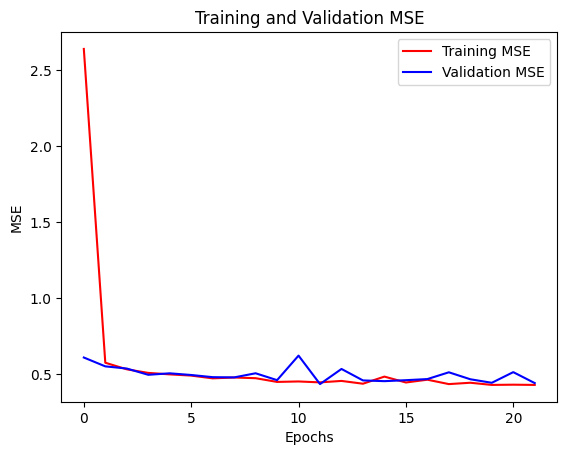

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mse=history.history['mse']
val_mse=history.history['val_mse']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(mse)) # Get number of epochs

#------------------------------------------------
# Plot training and validation mse per epoch
#------------------------------------------------
plt.plot(epochs, mse, 'r')
plt.plot(epochs, val_mse, 'b')
plt.title('Training and Validation MSE')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["Training MSE", "Validation MSE"])

plt.figure()

In [ ]:
def predict_pKd(drug, protein):
  drug_sequence = tokenizer_smiles.texts_to_sequences([drug])
  drug_padded = pad_sequences(drug_sequence, truncating = "post", padding = "post", maxlen = 85)
  protein_sequence = tokenizer_proteins.texts_to_sequences([protein])
  protein_padded = pad_sequences(protein_sequence, truncating = "post", padding = "post", maxlen = 1200)
  prediction = model.predict([tf.expand_dims(drug_padded, axis = -1), tf.expand_dims(protein_padded, axis = -1)])

  return(prediction.item())

In [ ]:
drug = test_smiles[1520]
protein = test_proteins[1520]
label = test_labels[1520]

print(label)
predict_pKd(drug = drug, protein = protein)

5.0
1/1 [==============================] - 0s 86ms/step


4.901474475860596

In [ ]:
loss, mse = model.evaluate([test_smiles_array, test_proteins_array], test_labels_array)
print("Test Mean Squared Error:", mse)

75/75 [==============================] - 3s 37ms/step - loss: 0.4368 - mse: 0.4368
Test Mean Squared Error: 0.4367693364620209
